# Individual Spectral Deconvolution

The purpose of this notebook is to deconvolute individual UV-Vis spectra from a sample mixture separated by LC-MS to ascertain peak parameters. These simpler peaks can then be applied to the deconvolution of a more complex sample mixture. This first step provides good initial guesses that will ensure that the deconvoluted standard curve has absorbances that are based on actual chemical species rather than calculated curves that give the best fit.

### References consulted
-  Eric Monson, Ph.D., data visualization analyst at Duke University Libraries' Center for Data and Visualization Sciences
- https://stackoverflow.com/questions/54851012/fitting-data-with-multiple-gaussian-profiles-in-python
- [Excel for Chemists: a Comprehensive Guide by E. Joseph Billo, 1997, Chapter 19 Analysis of Spectrophotometric Data](https://afitch.sites.luc.edu/Articles/DeLevie%20Deconvolution%20spectra%20excel.pdf)


In [10]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

## Bring in Individual Extracted Spectra data

This data set was collected by running the oxHHGY peptide mixture through a reverse phase LC-MS equipped with a photodiode array (PDA) detector. The UV-vis spectrum from each individual ion peak was extracted. There were 28 peptide species in the oxHHGY sample. Although the PDA collected data from 200-800nm, this data set was edited down to 250-500 nm to better focus on the areas with novel absorbances. Data was baseline corrected to provide accurate curve fitting parameters.

In [18]:
df = pd.read_excel('UVvis_data.xlsx', sheet_name='Individual Extracted Spectra')
df

,Wavelength,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,250,5.439652e-04,-0.001110,0.000099,7.220268e-04,0.000416,8.914948e-04,0.001137,0.000943,0.001017,...,0.000007,0.000006,0.000006,0.000005,0.000006,0.000006,0.000006,0.000006,5.886350e-06,0.010352
1,252,5.324152e-04,-0.000522,0.000099,7.146835e-04,0.000418,9.325981e-04,0.001164,0.000975,0.001040,...,0.000006,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,3.595352e-06,0.008048
2,254,5.351703e-04,-0.000133,0.000121,7.324219e-04,0.000447,1.053715e-03,0.001240,0.001071,0.001133,...,0.000006,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000002,2.068179e-06,0.006444
3,256,5.499522e-04,0.000111,0.000178,7.810593e-04,0.000471,1.236343e-03,0.001396,0.001232,0.001299,...,0.000006,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000001,1.129627e-06,0.005465
4,258,5.789333e-04,0.000300,0.000265,8.411407e-04,0.000550,1.462173e-03,0.001625,0.001441,0.001517,...,0.000006,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000001,6.059918e-07,0.004868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,492,-9.536743e-07,0.000155,-0.000117,-2.613068e-05,0.000005,-4.196167e-06,-0.000003,-0.000007,-0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.001032
122,494,6.410811e-06,0.000149,-0.000103,-1.344681e-05,0.000002,2.861023e-07,0.000001,-0.000009,-0.000005,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.001037
123,496,1.960331e-06,0.000152,-0.000078,-2.861023e-06,0.000024,1.058578e-05,0.000002,0.000009,0.000003,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000955
124,498,6.145901e-06,0.000166,-0.000089,2.288818e-06,0.000017,9.346008e-06,0.000021,0.000018,0.000010,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000939


### Plot all spectra to identify which have novel absorbances that need to be deconvoluted.

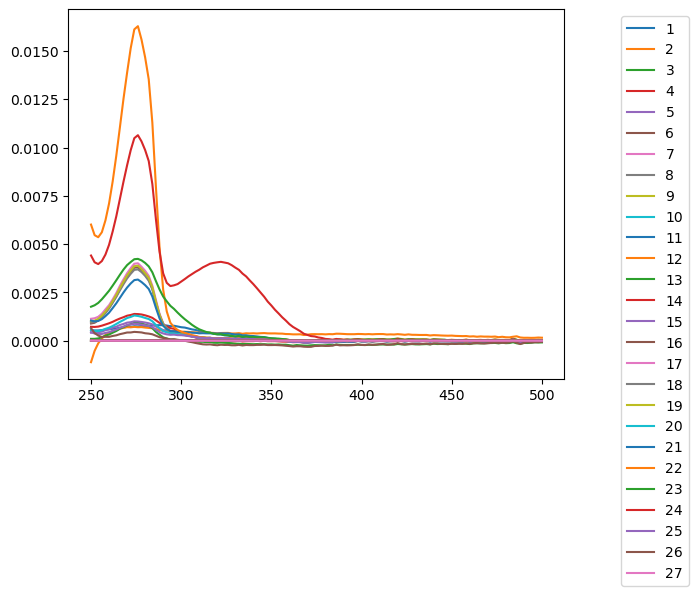

In [28]:
all_peaks = df.columns[1:28]
for p in all_peaks:
    peak = df[p]
    plt.plot(df['Wavelength'], peak, label = p)
    plt.legend()
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

### Spectra in the following two plots have been selected for peak deconvolution.

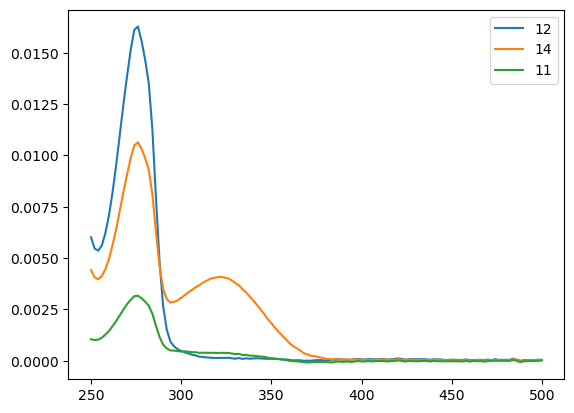

In [162]:
plt.plot(df['Wavelength'], df[12], label = '12')
plt.plot(df['Wavelength'], df[14], label = '14')
plt.plot(df['Wavelength'], df[11], label = '11')
plt.legend()
plt.show()

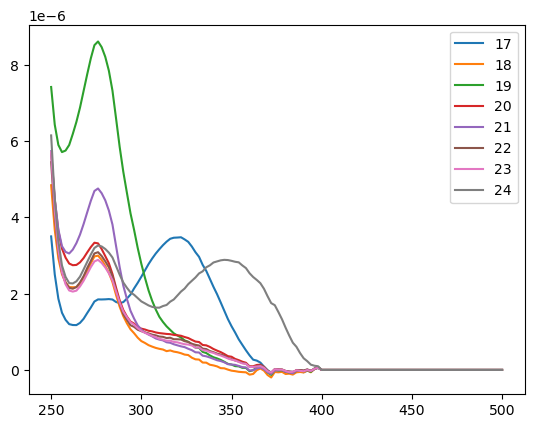

In [52]:
plt.plot(df['Wavelength'], df[17], label = '17')
plt.plot(df['Wavelength'], df[18], label = '18')
plt.plot(df['Wavelength'], df[19], label = '19')
plt.plot(df['Wavelength'], df[20], label = '20')
plt.plot(df['Wavelength'], df[21], label = '21')
plt.plot(df['Wavelength'], df[22], label = '22')
plt.plot(df['Wavelength'], df[23], label = '23')
plt.plot(df['Wavelength'], df[24], label = '24')
plt.legend()
plt.show()

## Define the equations for multi-Gaussian fitting

Per the __[Stack Overflow reference](https://stackoverflow.com/questions/54851012/fitting-data-with-multiple-gaussian-profiles-in-python)__, define the equations to be used on spectra that have 1, 2, or 3 peaks respectively. UV-vis absorbances are additive, meaning that overlapped peaks will "add" together, obscuring the actual center of both peaks. UV-vis absorbances are commonly described with Gaussian models, so this is an appropriate model to use for peaks that are overlapped.

In [14]:
def gaussian(x, A, x0, sig):
    return A*np.exp(-(x-x0)**2/(2*sig**2))

def multi_gaussian1(x, *pars):
    g1 = gaussian(x, pars[0], pars[1], pars[2]) 
    
    return g1

def multi_gaussian2(x, *pars):
    g1 = gaussian(x, pars[0], pars[1], pars[2])
    g2 = gaussian(x, pars[3], pars[4], pars[5])
    
    return g1 + g2

def multi_gaussian3(x, *pars):
    g1 = gaussian(x, pars[0], pars[1], pars[2])
    g2 = gaussian(x, pars[3], pars[4], pars[5])
    g3 = gaussian(x,pars[6], pars[7], pars[8])
    
    return g1 + g2 + g3

## Find parameters for Tyr/280 nm peak

Since the all of the peptides in the oxHHGY sample have a tyrosine (Tyr/Y) residue, they all have a peak absorbing at roughly 280 nm.The parameters for this peak need to be defined first so that the same parameters can be used for the deconvolution of all following spectra. Spectrum 12 is used to fit this peak as it has an intense, sharp peak and no other overlapping absorbance.

### Deconvolution Protocol
1. Start by making an arbitrary guess on the number of peaks in the spectrum, height of the peak (1st number), what wavelength the peak is centered at (2nd number), and width of the peak (3rd number)
2. For the initial guess, keep the lower and upper bounds broad so the model has "wiggle room" to estimate the optimal parameters


In [22]:
guess =        [0.01,280,5]                 
lower_bounds = (0.0005,260,0.0001 )
upper_bounds = (0.1,300,20)

This block calculates the fit curve. For the function `curve_fit` select the defined equation to use, x value (wavelength), y value (the individual spectrum to fit), and what was previously defined as the parameters for guess and bounds

In [24]:
popt, pcov = curve_fit(multi_gaussian1, df['Wavelength'], df[12], guess, bounds=(lower_bounds,upper_bounds))

__This plot shows the calculated cumulative "Fit" (red dash) overlaid on the spectrum of interest "Data" (gray line)__

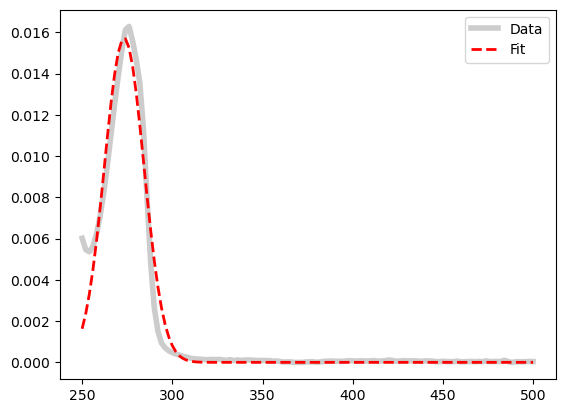

In [26]:
plt.figure()
plt.plot(df['Wavelength'], df[12], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian1(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

__This code gives the parameters for the fit peaks in order <br>__
[ height (intensity/au) , center (nm) , width (nm at half-height of peak) ]

In [29]:
np.set_printoptions(precision=3, suppress=True)
print(popt[0:3])

[  0.016 273.318  10.95 ]


__This plot shows cumulative fit (red dash) with the deconvoluted peaks (Fit#, colored lines)__ <br> 
Since this spectra only contains one peak, the two lines perfectly overlap each other. <br>
Although the bounds were very wide to allow optimal parameters to fit the experimental data, the initial calculated fit is good, but not great. The fit can be made better by starting with better "guess" parameters. With some manual refinment of parameters, a better fit can be achieved by the user.

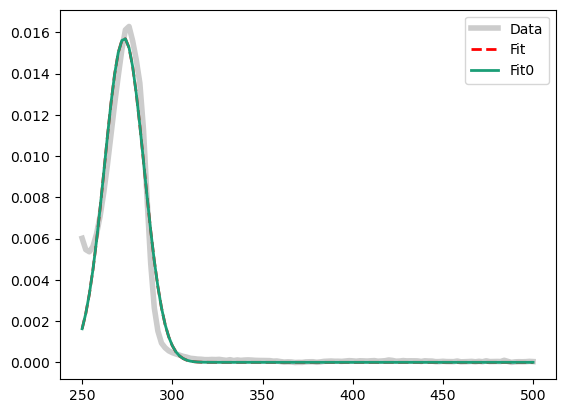

In [113]:
xx = df['Wavelength']
plt.plot(xx, df[12], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian1(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(1):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()

### Deconvolution Protocol
3. Use the calculated parameters from the initial guess to make better guesses
4. Continue to manually refine the guess, lower, and upper bounds parameters until the Fit matches the Data well

In [130]:
guess =        [0.01,279,8 ]                 
lower_bounds = (0.0005,275,0.0001 )
upper_bounds = (.016300,285,8.7)

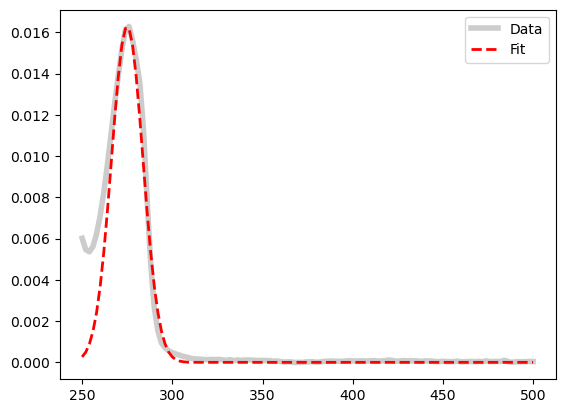

In [132]:
popt, pcov = curve_fit(multi_gaussian1, df['Wavelength'], df[12], guess, bounds=(lower_bounds,upper_bounds))
plt.figure()
plt.plot(df['Wavelength'], df[12], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian1(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

__Once the fit is satisfactory, note the center and width parameters for use in the deconvolution of all other spectra in the dataset__

In [135]:
np.set_printoptions(precision=3, suppress=True)
print(popt[0:3])

[  0.016 275.      8.7  ]


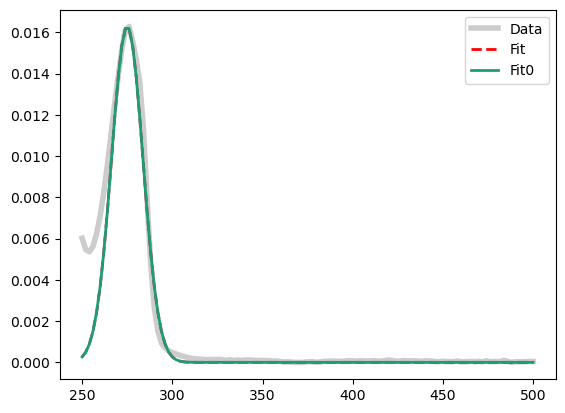

In [77]:
xx = df['Wavelength']
plt.plot(xx, df[12], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian1(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(1):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()

### Deconvolution Protocol
- Repeat steps 1-4 on the rest of the spectra of interest.
- Keep adding sets of guess, lower, and upper bounds for each peak in the spectrum
- The Tyr peak center and width bounds are taken from the deconvolution of the previous spectrum

    _For clarity, only the final parameters that lead to the best fits are shown for the rest of the specra. The initial guess and bounds parameters started wider as described in the protocol and were manually refined to reach these paramters_ 

In [145]:
guess =        [0.01,  275,    8,                0.004,  322,    15]
lower_bounds = (0.0005,275,  8,          0.00005,   320.8,   0.0001)
upper_bounds = (.010200,275.1,  8.7,            .00415, 324,    24.5)

__Change the defined equation here to match the number of peaks to be deconvoluted in the spectrum__

In [148]:
popt, pcov = curve_fit(multi_gaussian2, df['Wavelength'], df[14], guess, bounds=(lower_bounds,upper_bounds))

__This plot shows the cumulative Fit overlaid with the spectrum of interest__

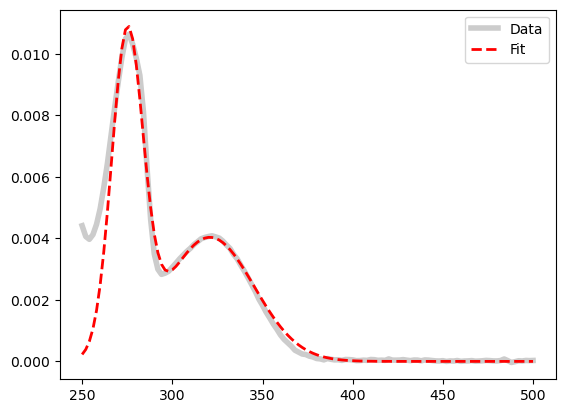

In [153]:
plt.figure()
plt.plot(df['Wavelength'], df[14], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian2(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

__Peak parameters are given in the order that the bounds were given. Note the center and width of the peak for use in the deconvolution of the standard curve__

In [24]:
np.set_printoptions(precision=5, suppress=True)
print(popt[0:3])
print(popt[3:6])

[  0.0102 275.       8.7   ]
[  0.00404 320.8      24.49882]


__This plot shows the individual deconvoluted peaks and their contribution to the cumulative Fit (red dash) overlaid with the spectrum of interest__ <br>
Change the range to equal the number of peaks in the spectrum

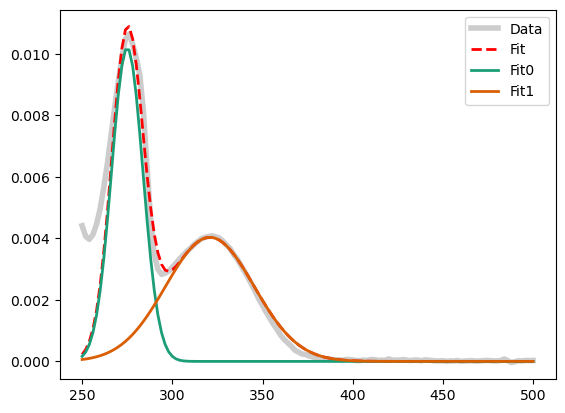

In [25]:
xx = df2['Wavelength']
plt.plot(xx, df2[14], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian2(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(2):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()

## Continue the deconvolution process for all other spectra of interest

In [166]:
guess =        [0.001,275,5,                   0.0004,322,15]
lower_bounds = (0.00005,275,0.0001,          0.000005,308,0.001)
upper_bounds = (0.003000,275.1,8.7,               .000435,330,30.5)

In [168]:
popt, pcov = curve_fit(multi_gaussian2, df['Wavelength'], df[11], guess, bounds=(lower_bounds,upper_bounds))

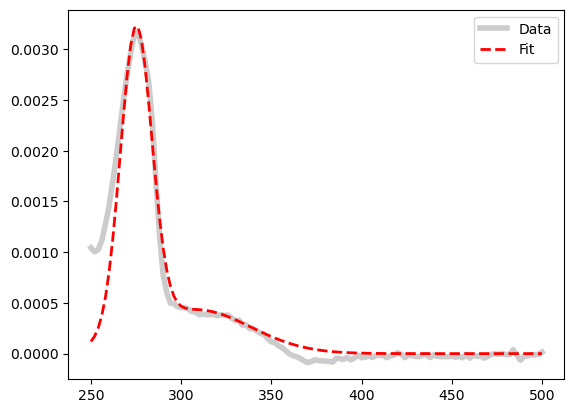

In [170]:
plt.figure()
plt.plot(df['Wavelength'], df[11], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian2(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

In [172]:
np.set_printoptions(precision=5, suppress=True)
print(popt[0:3])
print(popt[3:6])

[  0.003   275.        8.69978]
[  0.00043 308.00278  30.49469]


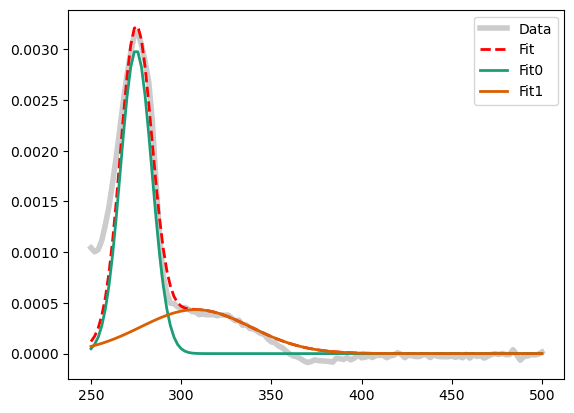

In [176]:
xx = df['Wavelength']
plt.plot(xx, df[11], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian2(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(2):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()

In [178]:
#fit peak 17

guess =        [0.00000149,275,8.7,                   0.00000349,319.1,21.2]
lower_bounds = (0.00000005,275,0.0001,          0.0000005,316,0.001)
upper_bounds = (0.000003,275.1,8.7,               .00002,325,25)

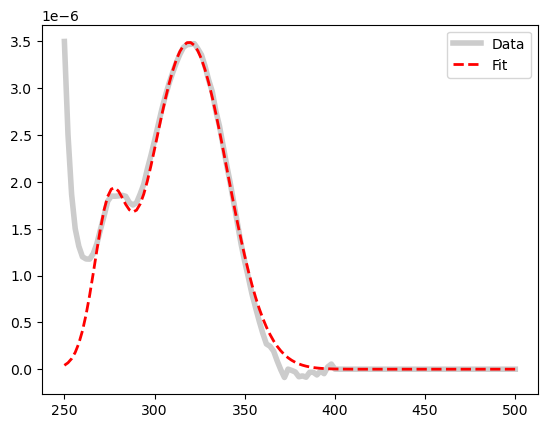

In [180]:
popt, pcov = curve_fit(multi_gaussian2, df['Wavelength'], df[17], guess, bounds=(lower_bounds,upper_bounds))
plt.figure()
plt.plot(df['Wavelength'], df[17], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian2(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

In [182]:
np.set_printoptions(precision=8, suppress=True)
print(popt[0:3])
print(popt[3:6])

[  0.00000149 275.00000003   8.7       ]
[  0.00000349 319.1         21.2       ]


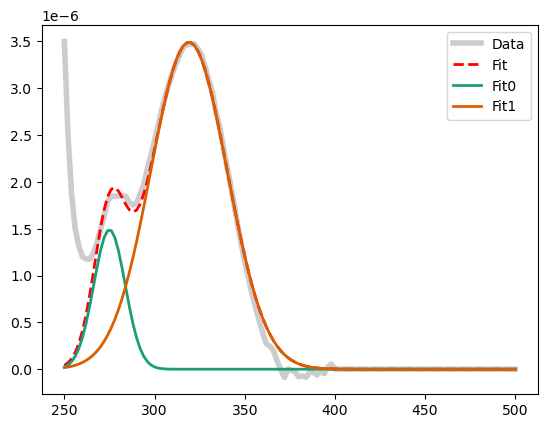

In [184]:
xx = df['Wavelength']
plt.plot(xx, df[17], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian2(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(2):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()

In [188]:
#fit peak 20

guess =        [0.0000028,275,8.7,                   0.00000097,305.5,30]
lower_bounds = (0.00000005,275,0.0001,            0.0000005,305,0.001)
upper_bounds = (0.00003,275.1,8.7,               .00002,325,35)

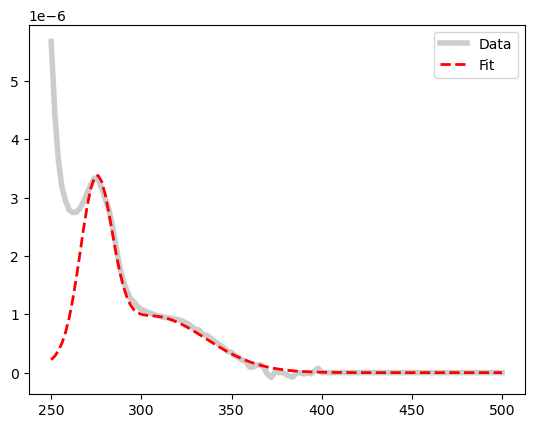

In [190]:
popt, pcov = curve_fit(multi_gaussian2, df['Wavelength'], df[20], guess, bounds=(lower_bounds,upper_bounds))
plt.figure()
plt.plot(df['Wavelength'], df[20], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian2(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

In [192]:
np.set_printoptions(precision=8, suppress=True)
print(popt[0:3])
print(popt[3:6])

[  0.0000028  275.00000003   8.7       ]
[  0.00000097 305.5         30.        ]


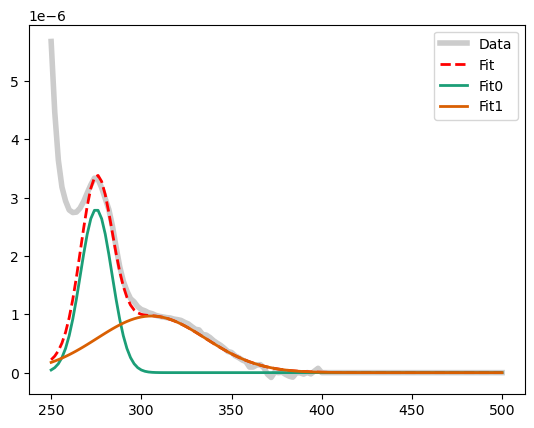

In [194]:
xx = df['Wavelength']
plt.plot(xx, df[20], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian2(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(2):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()

### Deconvolution of a spectra with 3 peaks
- This spectra now has two peaks with unknown parameters 
- Use the same process as before, but optimize fit from least overlapped (right most on spectrum) to most overlapped
- Once the parameters for the least overlapped peak give a satifactory fit to the experimental data, make the bounds narrow and refine the next peak

In [219]:

guess =        [0.0000075,275.,8.7,     0.0000025,292,  11,     0.00000090, 305.5 ,30.2 ]
lower_bounds = (0.000005,275,0.0001,    0.0000005,280, 0.001,   0.00000089, 305.4, 30.1 )
upper_bounds = (0.0000081,275.1,8.7,    0.000003, 320, 35,      0.00000098, 305.6, 30.6  )

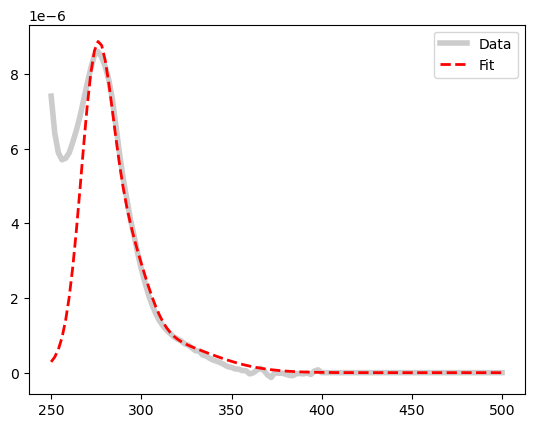

In [205]:
popt, pcov = curve_fit(multi_gaussian3, df['Wavelength'], df[19], guess, bounds=(lower_bounds,upper_bounds))
plt.figure()
plt.plot(df['Wavelength'], df[19], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian3(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

In [207]:
np.set_printoptions(precision=8, suppress=True)
print(popt[0:3])
print(popt[3:6])
print(popt[6:9])

[  0.0000075  275.00000003   8.7       ]
[  0.0000025 292.         11.       ]
[  0.0000009 305.5        30.2      ]


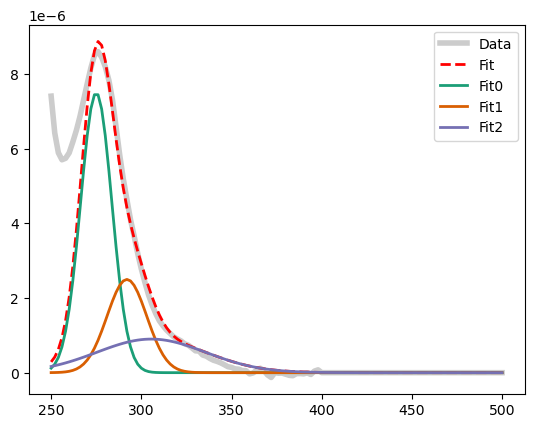

In [209]:
xx = df['Wavelength']
plt.plot(xx, df[19], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian3(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(3):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()


In [211]:
#fit peak 24

guess =        [0.0000028,275.,8.7,            0.00000295,346.5,23.6  ,  0.00000145 , 295, 13 ]
lower_bounds = (0.0000005,275,8.69,            0.0000005,346,0.00001 ,   0.00000001 , 280, 10 )
upper_bounds = (0.0004,275.1,8.7,              0.000005,400,25  ,       0.000002,     350, 30 )

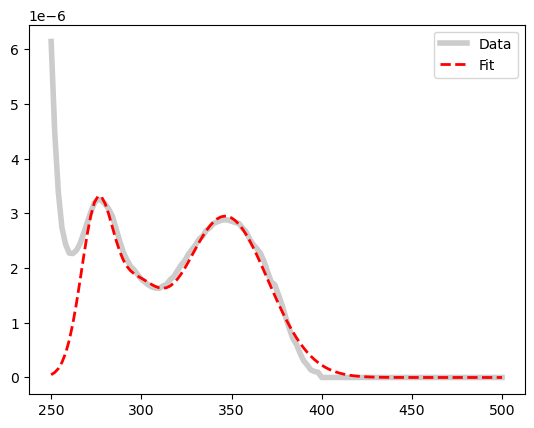

In [213]:
popt, pcov = curve_fit(multi_gaussian3, df['Wavelength'], df[24], guess, bounds=(lower_bounds,upper_bounds))
plt.figure()
plt.plot(df['Wavelength'], df[24], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian3(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

In [215]:
np.set_printoptions(precision=8, suppress=True)
print(popt[0:3])
print(popt[3:6])
print(popt[6:9])

[  0.0000028  275.00000003   8.7       ]
[  0.00000295 346.5         23.6       ]
[  0.00000145 295.          13.        ]


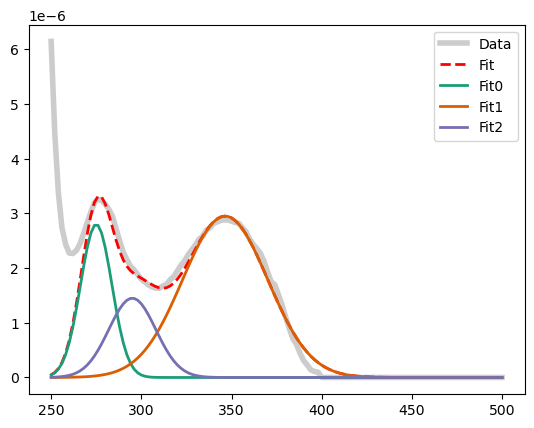

In [217]:
xx = df['Wavelength']
plt.plot(xx, df[24], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian3(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(3):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()


In [77]:
#Fit peak 28

guess =        [0.003,   275,    8.7,                0.003,  340,    15,        0.007, 411,  38       ]
lower_bounds = (0.0005,275,  0.0001,          0.00005,   333,   0.0001,      0.006, 410.9, 35         )
upper_bounds = (0.0041,300,  8.7,                0.00304, 360,    28,                  0.008, 413, 38      )

popt, pcov = curve_fit(multi_gaussian3, df['Wavelength'], df[28], guess, bounds=(lower_bounds,upper_bounds))

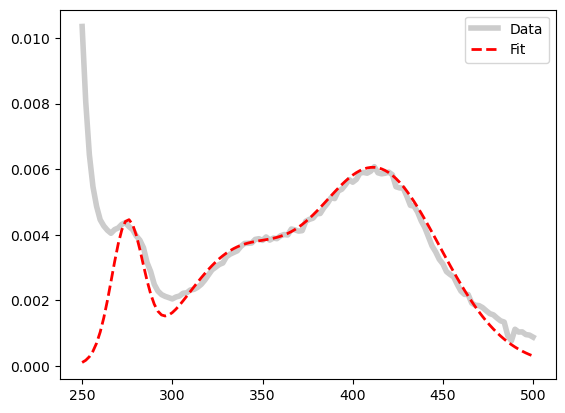

In [79]:
plt.figure()
plt.plot(df['Wavelength'], df[28], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(df['Wavelength'], multi_gaussian3(df['Wavelength'], *popt), 'r--', linewidth=2, label='Fit')
plt.legend()
plt.show()

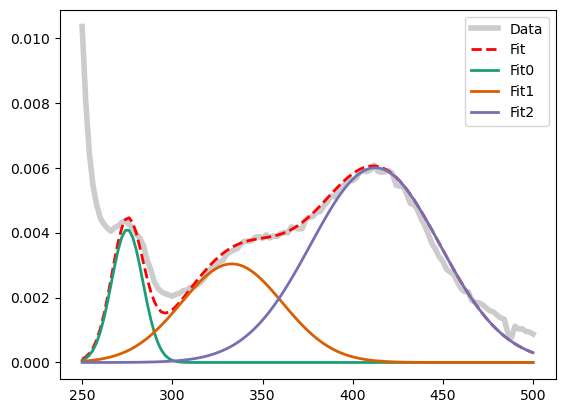

In [81]:
xx = df['Wavelength']
plt.plot(xx, df[28], '-', color='#CCCCCC', linewidth=4, label='Data')
plt.plot(xx, multi_gaussian3(xx, *popt), 'r--', linewidth=2, label='Fit')
for gg in range(3):
    plt.plot(xx, gaussian(xx,popt[gg*3],popt[gg*3+1],popt[gg*3+2]), '-', color=plt.cm.Dark2.colors[gg], linewidth=2, label='Fit'+str(gg))
plt.legend()
plt.show()

In [85]:
np.set_printoptions(precision=5, suppress=True)
print(popt[0:3])
print(popt[3:6])
print(popt[6:9])

[  0.0041 275.       8.7   ]
[  0.00304 333.00067  28.     ]
[  0.006   412.50663  35.78355]


### Peak width and center parameters calculated here are then used in "StandardCurve_Deconvolution" to fit an experimental curve containing a mixture of these individual spectra